# Eigen Values and Eigen Vectors
### By
## Fayyaz Minhas

Eigen decomposition is one of the most widely used Matrix analysis approaches in Linear Algebra. In this brief tutorial, we aim to understand how it works. 

Matrix multiplication with a vector can be thought of as a transformation of the point represented in the vector: $\mathbf y =\mathbf A\mathbf x$. Here, the point $\mathbf x$ has been transformed to $\mathbf y$ through its multiplication with the matrix $\mathbf A$. The transformation can be a scaling, shearing or projection, etc. which can change the direction of the point $\mathbf x$, i.e., the direction vectors of $\mathbf x$ and $\mathbf y$ may be in different. However, there are  some "characteristic" points $\mathbf v$ associated with the matrix, that undergo only a change in scale, i.e., $\mathbf w =\mathbf A\mathbf v = \lambda \mathbf v$. As $\mathbf w = \lambda \mathbf v$,  $\mathbf w$ and $\mathbf v$ are parallel or anti-parallel to each other with only a scalling by a multiplicative factor $\lambda$ resulting from the transformation. Such points or vectors are called "eigen" vectors (meaning "characteristic" in German), whereas, the associated scalars are called "eigen values".

Below we illustrate this in Python with a simple example. We take 4 points on the canonical axes and use a matrix to transform these points: $\mathbf q_i = \mathbf T \mathbf p_i$. Notice that for the original matrix, the direction vectors of all four points undergo only a scaling (by 2). Can you identify which points are the Eigen vectors of the given matrix? What are their corresponding Eigen values?

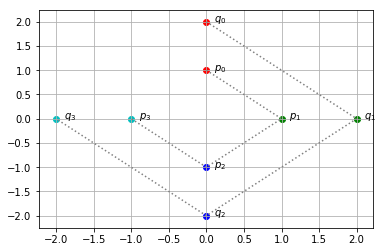

In [214]:
import matplotlib.pyplot as plt  
import numpy as np  
import string

# create the scaling transformation matrix
T = np.array([[2, 0], [0, 2]])
#T = np.random.randn(2,2)

a, b, c, d = (0, 1), (1, 0), (0, -1), (-1, 0)
# matrix with row vectors of points
X = np.vstack([a, b, c, d])

# Some plotting functions
def showPoints(A,head='p'):
    for i,xy in enumerate(A[:,:2]):
        x,y = xy
        plt.scatter(x, y, color=color_lut[i])
        plt.text(x + 0.1, y, '$'+head+'_'+str(int(i))+'$')
    plt.plot(A[:,0],A[:,1],color="gray", linestyle='dotted')
def showV(V,linestyle=None):
    for i in range(V.shape[1]):
        plt.arrow(0,0,0.8*V[0,i],0.8*V[1,i],color=color_lut[i],head_width=0.1,linestyle=linestyle)


showPoints(X)
showPoints((T@X.T).T,head = "q")
plt.grid();plt.show()

Let's find the eigen values and eigen vectors of the given matrix and plot them in an overly over the previous plot.

Original matrix:
 [[2 0]
 [0 2]]
Eigen values: [2. 2.]
Eigen Vectors:
 [[1. 0.]
 [0. 1.]]


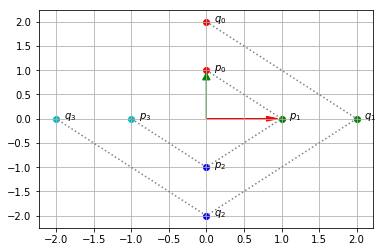

In [215]:
e,V = np.linalg.eig(T)
print("Original matrix:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.grid();plt.show()

Notice that there are two eigen vectors which correspond to the columns of the matrix V. Also, note that the eigen vectors are unit vectors (with a norm of 1.0). Furthermore, the two eigen vectors are parallel to the points $p_0$ and $p_1$. Can you think of why?

To verify that the matrix transformation only scales the eigen vectors and that also by the amount dictated by their eigen vectors, let's plot the original eigen vectors and the points resulting from transforming these points by matrix multiplication: $\mathbf w_i = \mathbf T \mathbf v_i$.

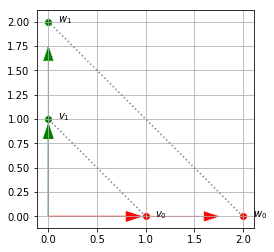

In [216]:
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.grid();plt.axis('square');plt.show()

Notice that in the plot above the points undergo scaling only by 2.0. Thus, these eigen vectors (and their eigen values) are a characteristic of the given matrix. If the matrix is changed, the resulting eigen vectors and values will be different as shown below.

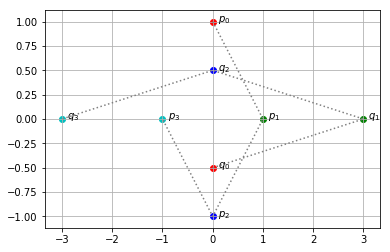

In [217]:
T = np.array([[3, 0], [0, -0.5]])
showPoints(X)
showPoints((T@X.T).T,head = "q")
plt.grid();plt.show()

Can you identify the eigen vectors and their corresponding eigen values from the plot above?

You can peek below if you want to look at the answer.

Original matrix:
 [[ 3.   0. ]
 [ 0.  -0.5]]
Eigen values: [ 3.  -0.5]
Eigen Vectors:
 [[1. 0.]
 [0. 1.]]


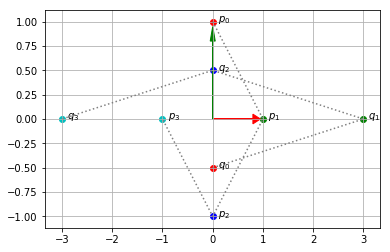

In [218]:
e,V = np.linalg.eig(T)
print("Original matrix:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.grid();plt.show()

The two eigen vectors are parallel to the points $p_0$ and $p_1$. Can you think of why?

We plot the points original and transformed eigen vectors below for verification.

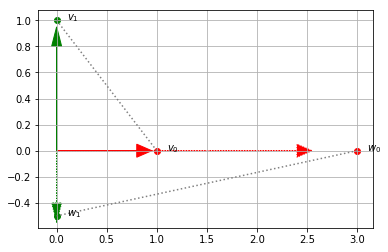

In [219]:
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.grid();plt.show()

Notice that the eigen points undergo only scaling. However, the direction of one of the points changes as the scaling factor is negative.

Let's do it for another matrix.

Original matrix:
 [[3 1]
 [0 2]]
Eigen values: [3. 2.]
Eigen Vectors:
 [[ 1.         -0.70710678]
 [ 0.          0.70710678]]


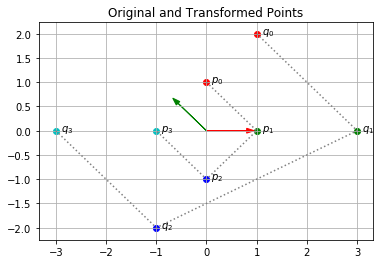

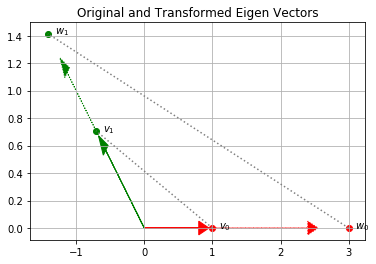

In [220]:
T = np.array([[3, 1], [0, 2]])
e,V = np.linalg.eig(T)
print("Original matrix:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.title("Original and Transformed Points")
plt.grid();plt.show()
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.title("Original and Transformed Eigen Vectors")
plt.grid();plt.show()

You can take more points and play with the code to develop a better understanding of eigen vectors and eigen values. 

## Eigen Decomposition

Note that since:

$\mathbf w_i = \mathbf T \mathbf v_i = \lambda_i \mathbf v_i$

Therefore, if $\mathbf V = [\mathbf v_1 | \mathbf v_2, ... | \mathbf v_k]$ and $\mathbf\Lambda$ is a diagonal matrix of eigen values, then:

$\mathbf T \mathbf V= \mathbf V \mathbf\Lambda$

Thus,

$\mathbf T =\mathbf V \mathbf \Lambda \mathbf V^{-1}$

Thus, the original matrix can be written in terms of its eigen values and eigen vectors which is called its eigen decomposition. 

In [221]:
print("Original matrix:\n",T)
print("Original matrix reconstructed from Eigen Decomposition:\n",V@np.diag(e)@np.linalg.inv(V))

Original matrix:
 [[3 1]
 [0 2]]
Original matrix reconstructed from Eigen Decomposition:
 [[3. 1.]
 [0. 2.]]


## References and Further reading
[Eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)

[Eigen Decomposition of a Matrix (Wikipedia)](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)